In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

start = "2012-01-01"
end = "2022-12-21"

stock = "GOOG"

data = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [120]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566149,16.614984,16.376264,16.485584,114989399
2,2012-01-05,16.336348,16.459302,16.267433,16.413690,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.860695,96.761695,93.497158,95.089614,26452900
2757,2022-12-15,90.770073,93.586734,90.003706,93.099046,28298800
2758,2022-12-16,90.431671,91.317475,89.585680,90.770065,48485500


Moving average for 100 days

In [121]:
ma_100_days = data.Close.rolling(window=100).mean()


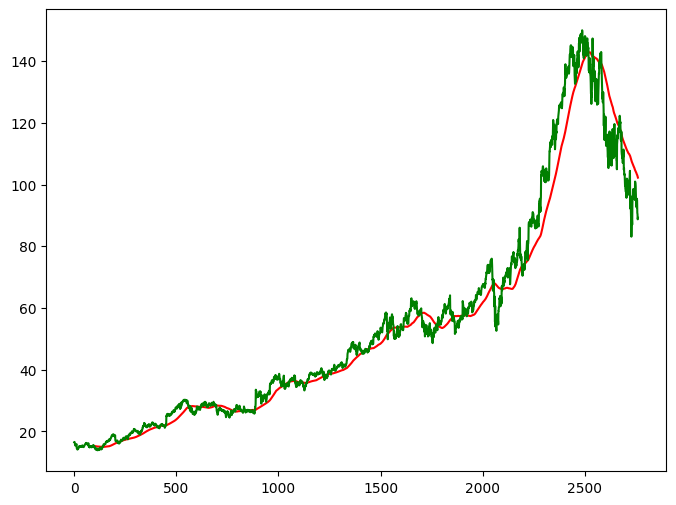

In [122]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label="100 days MA")
plt.plot(data.Close, 'g', label="Close Price")


Moving average for 200 days


In [123]:
ma_200_days = data.Close.rolling(window=200).mean()


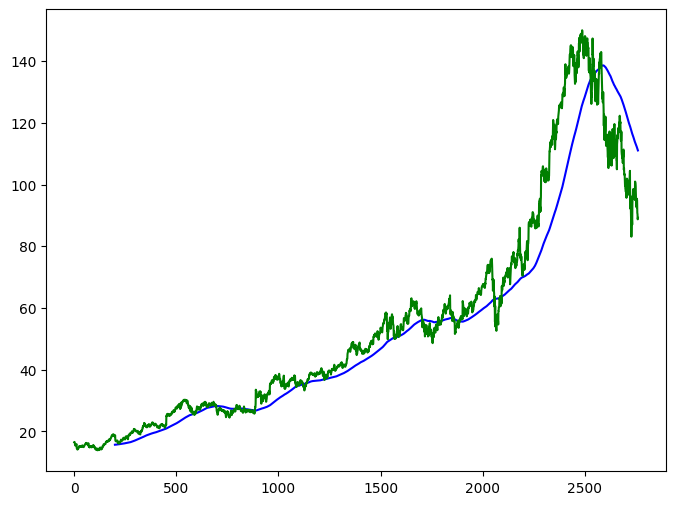

In [124]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days, 'b', label="200 days MA")
plt.plot(data.Close, 'g', label="Close Price")

In [125]:
data.dropna(inplace=True)

Training the model with 80%(training) and 20%(testing)

In [126]:
data_train = data.Close[0:int(len(data)*0.8)]

data_test = data.Close[int(len(data)*0.8):]

data_train


Ticker,GOOG
0,16.495001
1,16.566149
2,16.336348
3,16.113497
4,15.430305
...,...
2203,73.950737
2204,72.329407
2205,72.670311
2206,73.946259


In [127]:

data_train.shape[0]

2208

In [128]:
data_test.shape[0]

553

In [129]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))

data_train_scale = scalar.fit_transform(data_train)

In [130]:
x= []
y= []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])  # last 100 days data
    y.append(data_train_scale[i,0])

In [131]:
x,y = np.array(x), np.array(y)

In [132]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [133]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = ((x.shape[1],1))))

model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=False))
model.add(Dropout(0.5))

model.add(Dense(units=1))



c:\Users\mihir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [134]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [135]:
model.fit(x,y, epochs=50, batch_size=32)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - loss: 0.0679
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - loss: 0.0063
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - loss: 0.0057
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - loss: 0.0062
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - loss: 0.0057
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - loss: 0.0043
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - loss: 0.0046
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - loss: 0.0040
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - loss: 0.0043
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - loss: 0.0036
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - loss: 0.0040
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - loss: 0.0035
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - loss: 0.0040
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 0.0036
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [136]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

adding last 100 days data to test data

In [137]:
pas_100_days = data_train.tail(100)

data_test = pd.concat([pas_100_days,data_test], ignore_index=True)
                      

In [138]:
data_test_scale = scalar.fit_transform(data_test)

In [139]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
    
x,y = np.array(x), np.array(y)

In [140]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step


In [141]:
1/scalar.scale_

array([82.32406616])

In [142]:
y_predict = y_predict * (1/scalar.scale_)


In [143]:
y = y * (1/scalar.scale_)

graph of 

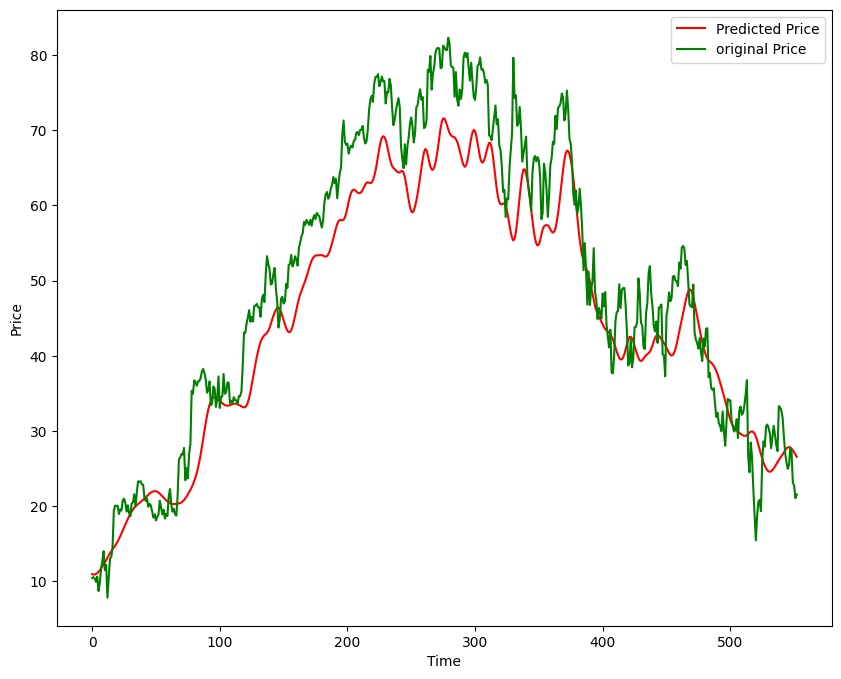

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



In [145]:
model.save('StockPrediction.keras')